**Chest Scan Analysis Model**

In [1]:
!pip install Pillow

In [2]:
import tensorflow as tf

In [3]:
import matplotlib

In [4]:
from PIL import Image

In [5]:
diagnosis = ["Covid", "Normal", "Viral Pneumonia"]

In [6]:
args = {
    "labels": "inferred", #
    "label_mode": "categorical",
    "batch_size": 32, #32 images at once
    "image_size": (256,256), #resizing all images to 256x256
    "seed": 1,
    "validation_split": .2, #20 percent of data used for testing, 80 for training
    "class_names": diagnosis
}

In [7]:
train = tf.keras.utils.image_dataset_from_directory( #high level model
    "/Users/rajpenmetcha/Downloads/Covid19-dataset",
    subset="training",
    **args
)

Found 317 files belonging to 3 classes.
Using 254 files for training.


In [8]:
test = tf.keras.utils.image_dataset_from_directory(
    "/Users/rajpenmetcha/Downloads/Covid19-dataset",
    subset="validation",
    **args
)

Found 317 files belonging to 3 classes.
Using 63 files for validation.


In [9]:
first = train.take(1)
first

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [10]:
images, labels = list(first)[0] 

2025-02-05 21:40:29.657900: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
first_image = images[0]
first_image

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[  4.890625 ,   4.890625 ,   4.890625 ],
        [  5.8308105,   5.8308105,   5.8308105],
        [  7.2648926,   7.2648926,   7.2648926],
        ...,
        [ 13.828857 ,  13.828857 ,  13.828857 ],
        [ 11.169189 ,  11.169189 ,  11.169189 ],
        [  9.5407715,   9.5407715,   9.5407715]],

       [[  4.890625 ,   4.890625 ,   4.890625 ],
        [  6.1486816,   6.1486816,   6.1486816],
        [  7.2478027,   7.2478027,   7.2478027],
        ...,
        [ 15.640625 ,  15.640625 ,  15.640625 ],
        [ 12.       ,  12.       ,  12.       ],
        [ 10.109375 ,  10.109375 ,  10.109375 ]],

       [[  4.       ,   4.       ,   4.       ],
        [  5.       ,   5.       ,   5.       ],
        [  5.808838 ,   5.808838 ,   5.808838 ],
        ...,
        [ 11.609619 ,  11.609619 ,  11.609619 ],
        [  9.379639 ,   9.379639 ,   9.379639 ],
        [  9.936768 ,   9.936768 ,   9.936768 ]],

       ...,

     

In [12]:
first_image[:3,:3,1]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[4.890625 , 5.8308105, 7.2648926],
       [4.890625 , 6.1486816, 7.2478027],
       [4.       , 5.       , 5.808838 ]], dtype=float32)>

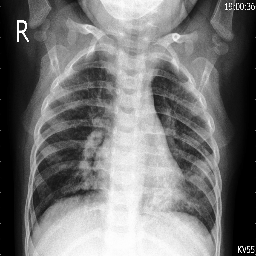

In [13]:
Image.fromarray(first_image.numpy().astype("uint8"))

In [14]:
labels[0]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 0., 1.], dtype=float32)>

In [15]:
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding="same", activation="relu",input_shape=(256,256,3)),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(len(diagnosis))
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"])

In [18]:
history = model.fit(
    train,
    validation_data=test,
    epochs=5,
    verbose=1
)


Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5032 - loss: 60.1628 - val_accuracy: 0.7302 - val_loss: 7.1589
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7350 - loss: 10.0126 - val_accuracy: 0.7460 - val_loss: 6.8877
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7969 - loss: 4.3183 - val_accuracy: 0.7302 - val_loss: 4.3681
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8482 - loss: 1.8108 - val_accuracy: 0.8571 - val_loss: 1.7892
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9196 - loss: 0.8007 - val_accuracy: 0.7460 - val_loss: 1.6923


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1048576)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │   134,217,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,656,075 (1.50 GB)

 Trainable params: 134,218,691 (512.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 268,437,384 (1.00 GB)

<Axes: >

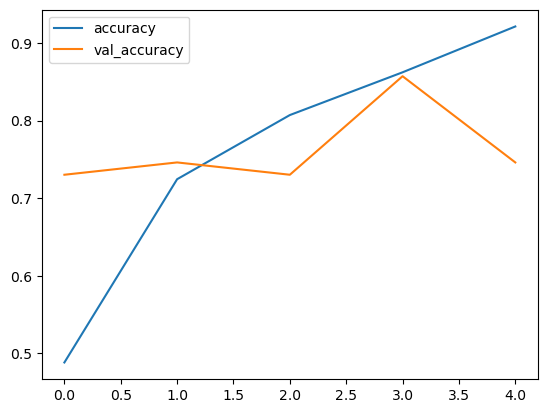

In [20]:
import pandas as pd
history_df = pd.DataFrame.from_dict(history.history)
history_df[["accuracy", "val_accuracy"]].plot()

In [21]:
def train_model (network, epochs=5):
    model = Sequential(network)
    
    model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"])
    
    history = model.fit(
    train,
    validation_data=test,
    epochs=5,
    verbose=1
    )
    
    history_df = pd.DataFrame.from_dict(history.history)


In [22]:
network = [
    layers.Rescaling(1./255),
    
    layers.Conv2D(16,4,padding="same", activation="relu",input_shape=(256,256,3)), #increase size of window
    layers.MaxPooling2D(), #shrinks num of parameters and makes it run faster, prevents overfitting
    layers.Conv2D(32,4,padding="same", activation="relu",input_shape=(256,256,3)), #lets network pick up higher level features
    layers.MaxPooling2D(),
    layers.Conv2D(64,4,padding="same", activation="relu",input_shape=(256,256,3)), #lets network pick up higher level features
    layers.Dropout(0.2),#prevents overfitting, by randomly setting some outputs to 0
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(len(diagnosis))
]

#history_df, model = train_model(network)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
#history_df[["accuracy", "val_accuracy"]].plot()

In [24]:
#data augmentation, since we dont have much data,  we can randomly alter things in our images
#data_augmentation = tf.keras.Sequential([
#    layers.RandomFlip("horizontal", seed=1),
#    layers.RandomRotation(.2,seed=1),
#    layers.RandomZoom(.2,seed=1)
#])

In [25]:
#full_network = [data_augmentation] + network

In [26]:
#history_df,model = train_model(full_network)

In [27]:
#history_df[["accuracy", "val_accuracy"]].plot()

In [28]:
preds = model.predict(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [29]:
preds

array([[70.36002   , 16.349333  , 11.4794655 ],
       [61.499084  , 43.455303  ,  3.7403455 ],
       [ 6.349421  , 37.319603  , 63.517406  ],
       [15.029227  , 52.0395    , 53.866653  ],
       [ 1.5960355 , 43.257122  , 66.059166  ],
       [15.449094  , 38.099953  , 66.41774   ],
       [35.60343   , 43.183838  , 39.46599   ],
       [62.38425   , 46.339756  ,  1.9951006 ],
       [79.18425   , 37.67711   , 18.570518  ],
       [23.72347   , 38.865177  , 55.003555  ],
       [74.84941   , 31.118364  ,  9.071275  ],
       [55.514866  , 50.54026   ,  8.142904  ],
       [ 4.7554855 , 40.132046  , 63.58562   ],
       [76.133644  , 39.91427   ,  7.6448574 ],
       [16.84365   , 48.909107  , 52.546173  ],
       [38.1066    , 57.794674  , 26.473656  ],
       [20.762415  , 35.121544  , 62.363075  ],
       [55.40201   , 20.635271  , 27.252956  ],
       [43.01404   , 47.74664   , 25.21647   ],
       [72.15252   , 21.03001   , -2.4532313 ],
       [32.824516  , 24.421564  , 19.716

In [30]:
import numpy as np

In [31]:
predicted_class = np.argmax(preds, axis=1) #turn predictions from label to single number


In [32]:
predicted_class

array([0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0,
       1, 1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 1, 0, 0])

In [33]:
actual_labels = np.concatenate([y for x, y in test], axis=0)

2025-02-05 21:41:55.249523: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [34]:
actual_class = np.argmax(actual_labels, axis=1) #

In [35]:
import itertools

actual_image = [x.numpy().astype("uint8") for x, y in test] #iterate through each batch in test
actual_image = list(itertools.chain.from_iterable(actual_image)) #compresses list

In [36]:
actual_image = [Image.fromarray(a) for a in actual_image] #gives list of python images

In [37]:
pred_df = pd.DataFrame(zip(predicted_class, actual_class, actual_image),columns = ["prediction","actual", "image"]) #dataframe w predictions

In [38]:
pred_df["prediction"] = pred_df["prediction"].apply(lambda x: diagnosis[x])

In [39]:
pred_df["actual"] = pred_df["actual"].apply(lambda x: diagnosis[x])

In [40]:
pred_df.head()

,prediction,actual,image
0,Covid,Covid,<PIL.Image.Image image mode=RGB size=256x256 a...
1,Covid,Covid,<PIL.Image.Image image mode=RGB size=256x256 a...
2,Viral Pneumonia,Viral Pneumonia,<PIL.Image.Image image mode=RGB size=256x256 a...
3,Viral Pneumonia,Normal,<PIL.Image.Image image mode=RGB size=256x256 a...
4,Viral Pneumonia,Viral Pneumonia,<PIL.Image.Image image mode=RGB size=256x256 a...


,prediction,actual,image
0,Covid,Covid,
1,Covid,Covid,
2,Viral Pneumonia,Viral Pneumonia,
3,Viral Pneumonia,Normal,
4,Viral Pneumonia,Viral Pneumonia,
5,Viral Pneumonia,Viral Pneumonia,
6,Normal,Covid,
7,Covid,Covid,
8,Covid,Covid,
9,Viral Pneumonia,Viral Pneumonia,

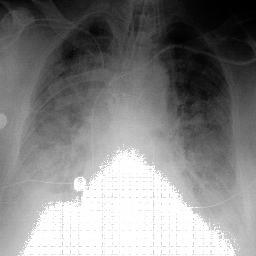
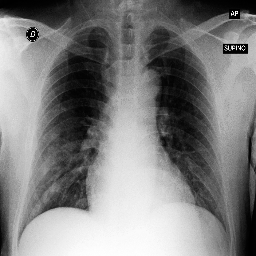
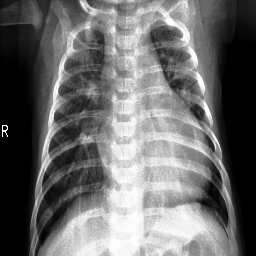
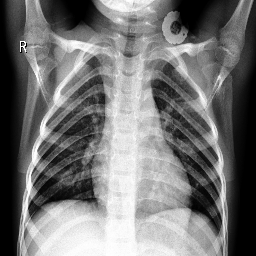
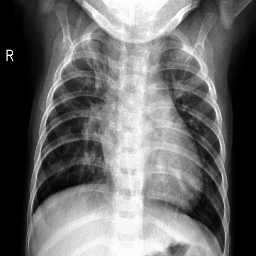
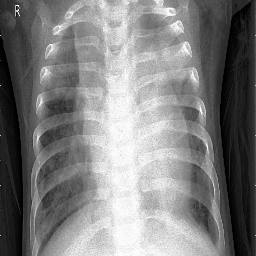
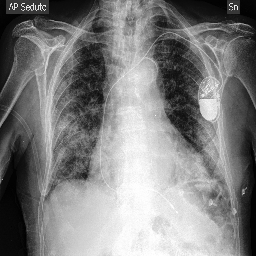
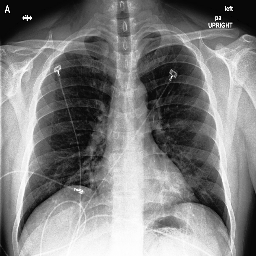
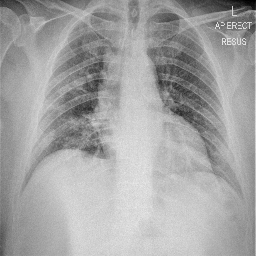
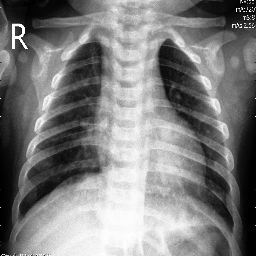

In [41]:
import base64
import io

def image_formatter(img): #renders images
    with io.BytesIO() as buffer:
        img.save(buffer,'png')
        img_str = base64.b64encode(buffer.getvalue()).decode()
    return f'<img src="data:image/jpeg;base64,{img_str}">'
pred_df.head(10).style.format({'image': image_formatter})